In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from pandas import Series, DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [9]:
df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [10]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index,inplace=True)

In [11]:
df.shape

(26925, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26228 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [14]:
print(df.depth.isnull().sum())
print(df.shape[0])

697
26925


In [15]:
# proportion of missing values of depth
(697/26925)*100

2.588672237697307

In [16]:
df.depth.median()

61.8

In [17]:
df['depth']=df['depth'].fillna(value=61.8)

In [18]:
print(df['y'].median())
print(df['z'].median())

5.7
3.52


In [19]:
df['y']=df['y'].replace(58.9,5.7)
df['z']=df['z'].replace(31.8,3.52)

In [20]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [21]:
print('cut:', df.cut.value_counts())
print('--------')
print('color:', df.color.value_counts())
print('--------')
print('clarity:', df.clarity.value_counts())

cut: Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64
--------
color: G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64
--------
clarity: SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.746982,1.393457,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.731176,1.117804,3.71,4.71,5.70,6.54,10.16
z,26925.0,3.537770,0.696503,1.07,2.90,3.52,4.04,8.06
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00


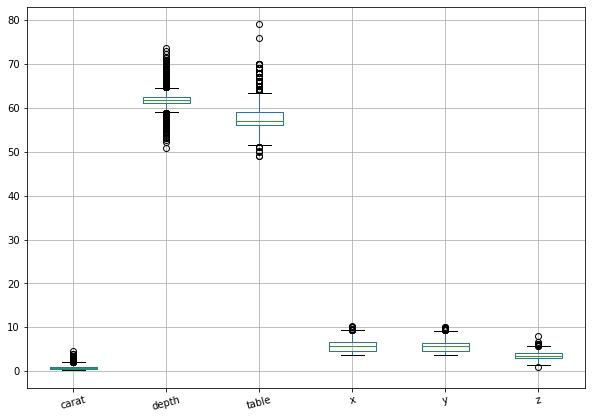

In [23]:
# df.columns
plt.figure(figsize=(10,7))
df.boxplot(['carat', 'depth', 'table', 'x', 'y', 'z'])
plt.xticks(rotation = 15) 
plt.show()

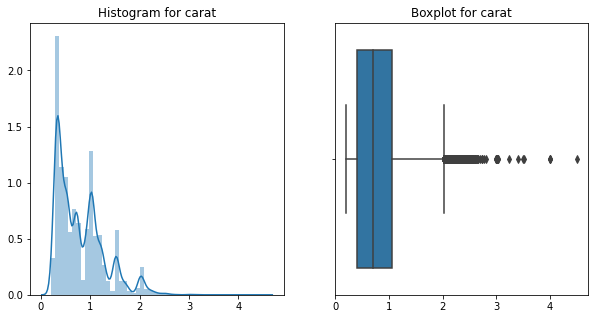

In [24]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.carat,kde=True,ax=ax[0])
sns.boxplot(x='carat',data=df,ax=ax[1])
ax[0].set_title('Histogram for carat')
ax[1].set_title('Boxplot for carat')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

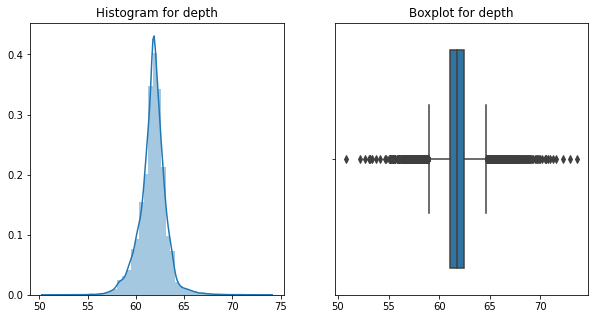

In [25]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.depth,kde=True,ax=ax[0])
sns.boxplot(x='depth',data=df,ax=ax[1])
ax[0].set_title('Histogram for depth')
ax[1].set_title('Boxplot for depth')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

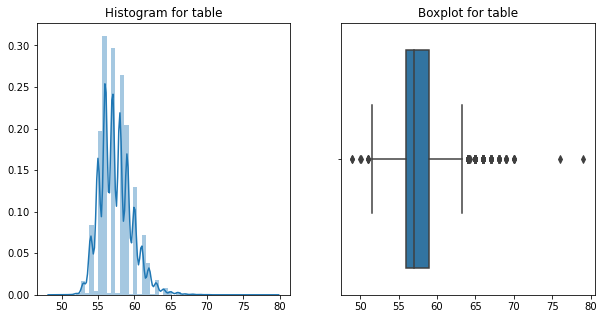

In [26]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.table,kde=True,ax=ax[0])
sns.boxplot(x='table',data=df,ax=ax[1])
ax[0].set_title('Histogram for table')
ax[1].set_title('Boxplot for table')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

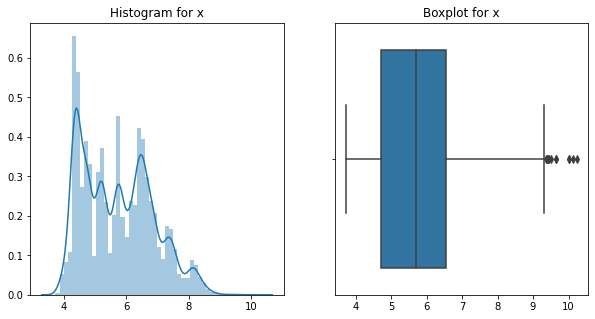

In [27]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.x,kde=True,ax=ax[0])
sns.boxplot(x='x',data=df,ax=ax[1])
ax[0].set_title('Histogram for x')
ax[1].set_title('Boxplot for x')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

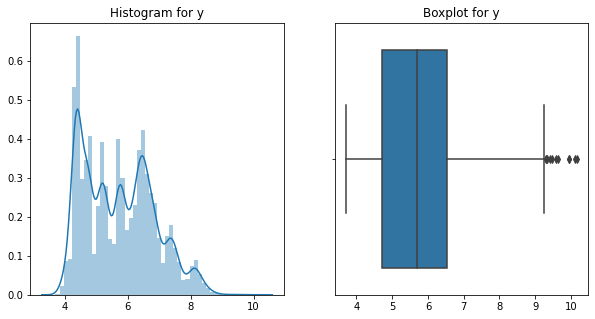

In [28]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.y,kde=True,ax=ax[0])
sns.boxplot(x='y',data=df,ax=ax[1])
ax[0].set_title('Histogram for y')
ax[1].set_title('Boxplot for y')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

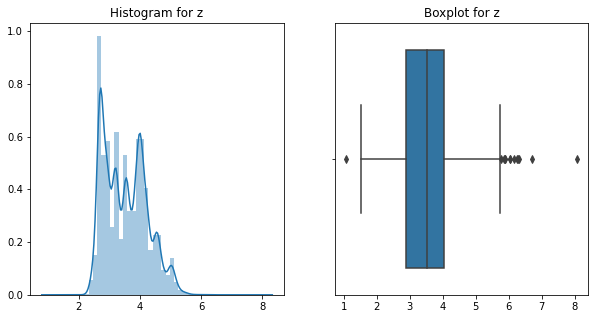

In [29]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.z,kde=True,ax=ax[0])
sns.boxplot(x='z',data=df,ax=ax[1])
ax[0].set_title('Histogram for z')
ax[1].set_title('Boxplot for z')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

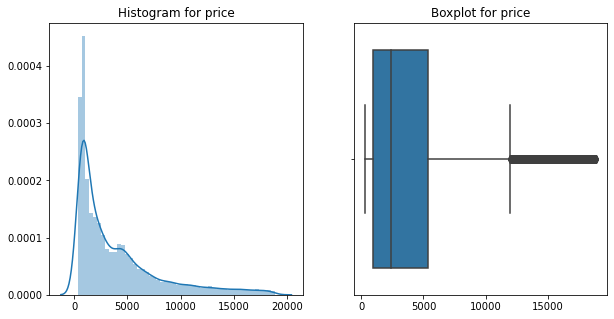

In [30]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(df.price,kde=True,ax=ax[0])
sns.boxplot(x='price',data=df,ax=ax[1])
ax[0].set_title('Histogram for price')
ax[1].set_title('Boxplot for price')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

In [31]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [32]:
for i in df.columns:
    if ((df[i].dtype == 'int64') or (df[i].dtype == 'float64')):
        print("Skewness for", i,"is: ",round(df[i].skew(),2))

Skewness for carat is:  1.11
Skewness for depth is:  -0.03
Skewness for table is:  0.76
Skewness for x is:  0.4
Skewness for y is:  0.4
Skewness for z is:  0.41
Skewness for price is:  1.62


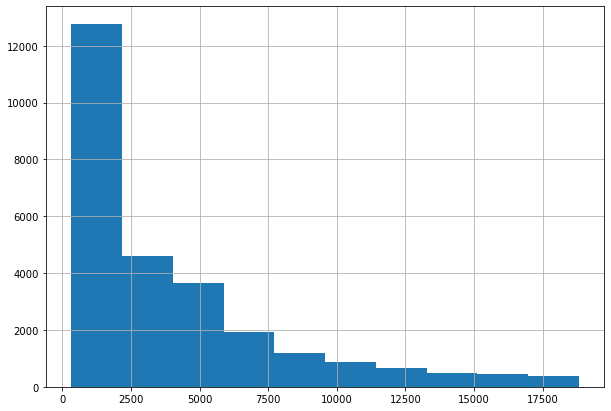

In [33]:
plt.figure(figsize = (10,7))
df['price'].hist()
plt.show()

In [34]:
df.shape

(26925, 10)

Text(0.5, 0, 'Cut: Worst---> Best')

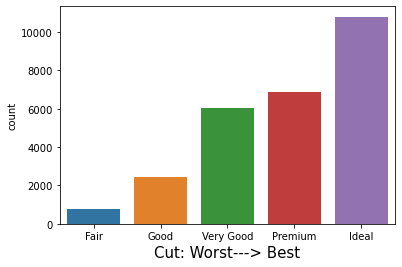

In [35]:
# cut, color, clarity
sns.countplot(df['cut'],order=['Fair','Good','Very Good','Premium','Ideal'])
plt.xlabel('Cut: Worst---> Best', fontsize=15)

Text(0.5, 0, 'Color: Worst---> Best')

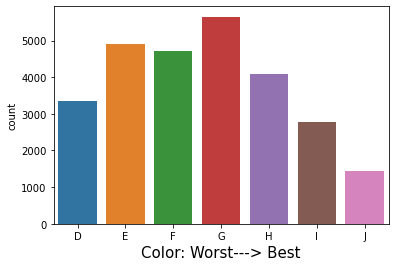

In [36]:
sns.countplot(df['color'],order=['D','E','F','G','H','I','J'])
plt.xlabel('Color: Worst---> Best', fontsize=15)

Text(0.5, 0, 'Clarity: Worst---> Best')

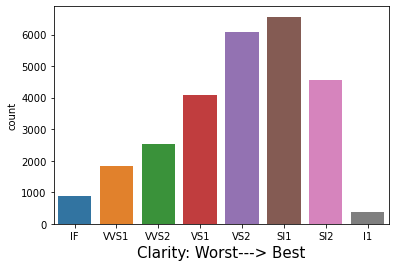

In [37]:
sns.countplot(df['clarity'],order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])
plt.xlabel('Clarity: Worst---> Best', fontsize=15)

<AxesSubplot:xlabel='cut', ylabel='count'>

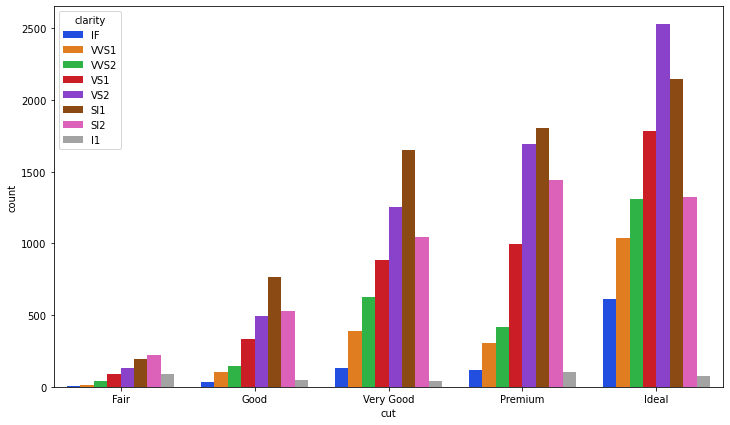

In [38]:
plt.figure(figsize = (12,7))
sns.countplot(x="cut", hue="clarity", data=df,order=['Fair','Good','Very Good','Premium','Ideal'],hue_order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],palette="bright")

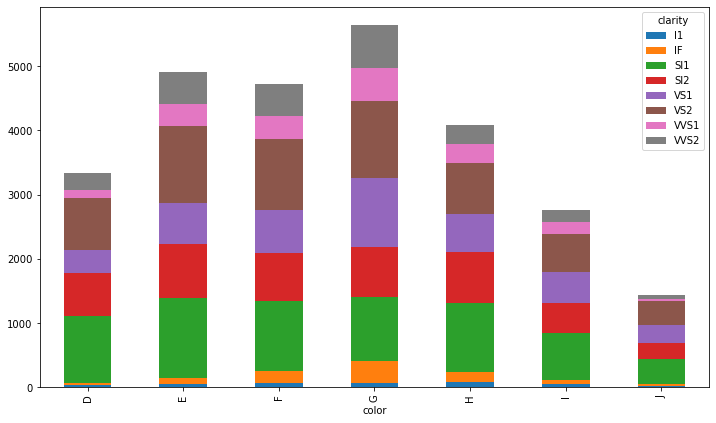

In [39]:
ct = pd.crosstab(df['color'],df['clarity'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (12,7))
plt.show()
# green and brown has produced most VS2 and SL1

<AxesSubplot:xlabel='cut'>

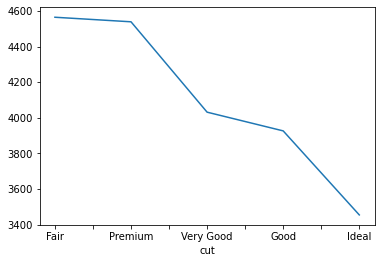

In [40]:
df.groupby('cut').mean()['price'].sort_values(ascending = False).plot(kind='line')
#  Fair, Good, Very Good, Premium, Ideal.

<AxesSubplot:xlabel='color'>

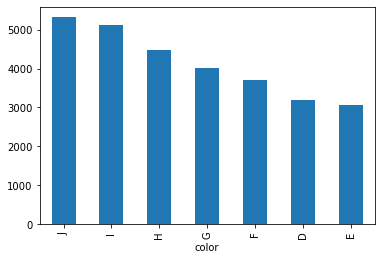

In [41]:
df.groupby('color').mean()['price'].sort_values(ascending = False).plot(kind='bar')
# order=['D','E','F','G','H','I','J']

<AxesSubplot:xlabel='clarity'>

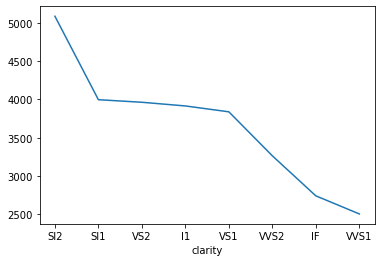

In [42]:
df.groupby('clarity').mean()['price'].sort_values(ascending = False).plot(kind='line')
# IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
# people like the mid range

In [ ]:
# pd.crosstab(df['clarity'],df['cut'])

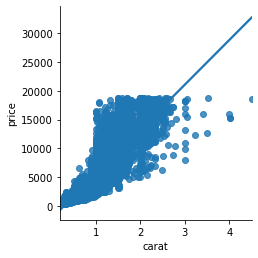

In [43]:
# any linear relationship
sns.lmplot(x="carat", y="price", data=df,height=3.5)
plt.show()

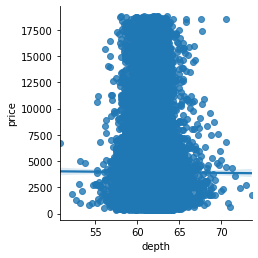

In [44]:
# any linear relationship
sns.lmplot(x="depth", y="price", data=df,height=3.5)
plt.show()
# No relationship

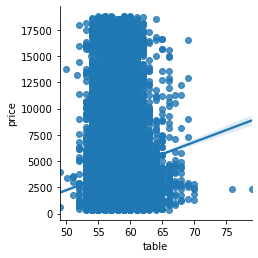

In [45]:
# any linear relationship
sns.lmplot(x="table", y="price", data=df,height=3.5)
plt.show()

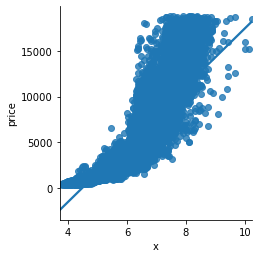

In [46]:
# any linear relationship
sns.lmplot(x="x", y="price", data=df,height=3.5)
plt.show()

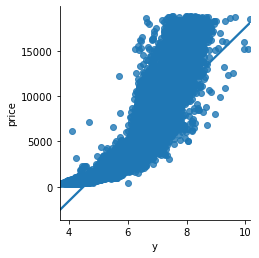

In [47]:
# any linear relationship
sns.lmplot(x="y", y="price", data=df,height=3.5)
plt.show()

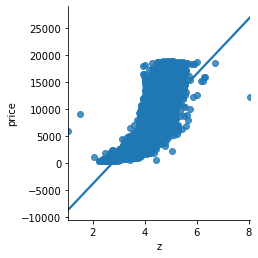

In [48]:
# any linear relationship
sns.lmplot(x="z", y="price", data=df,height=3.5)
plt.show()

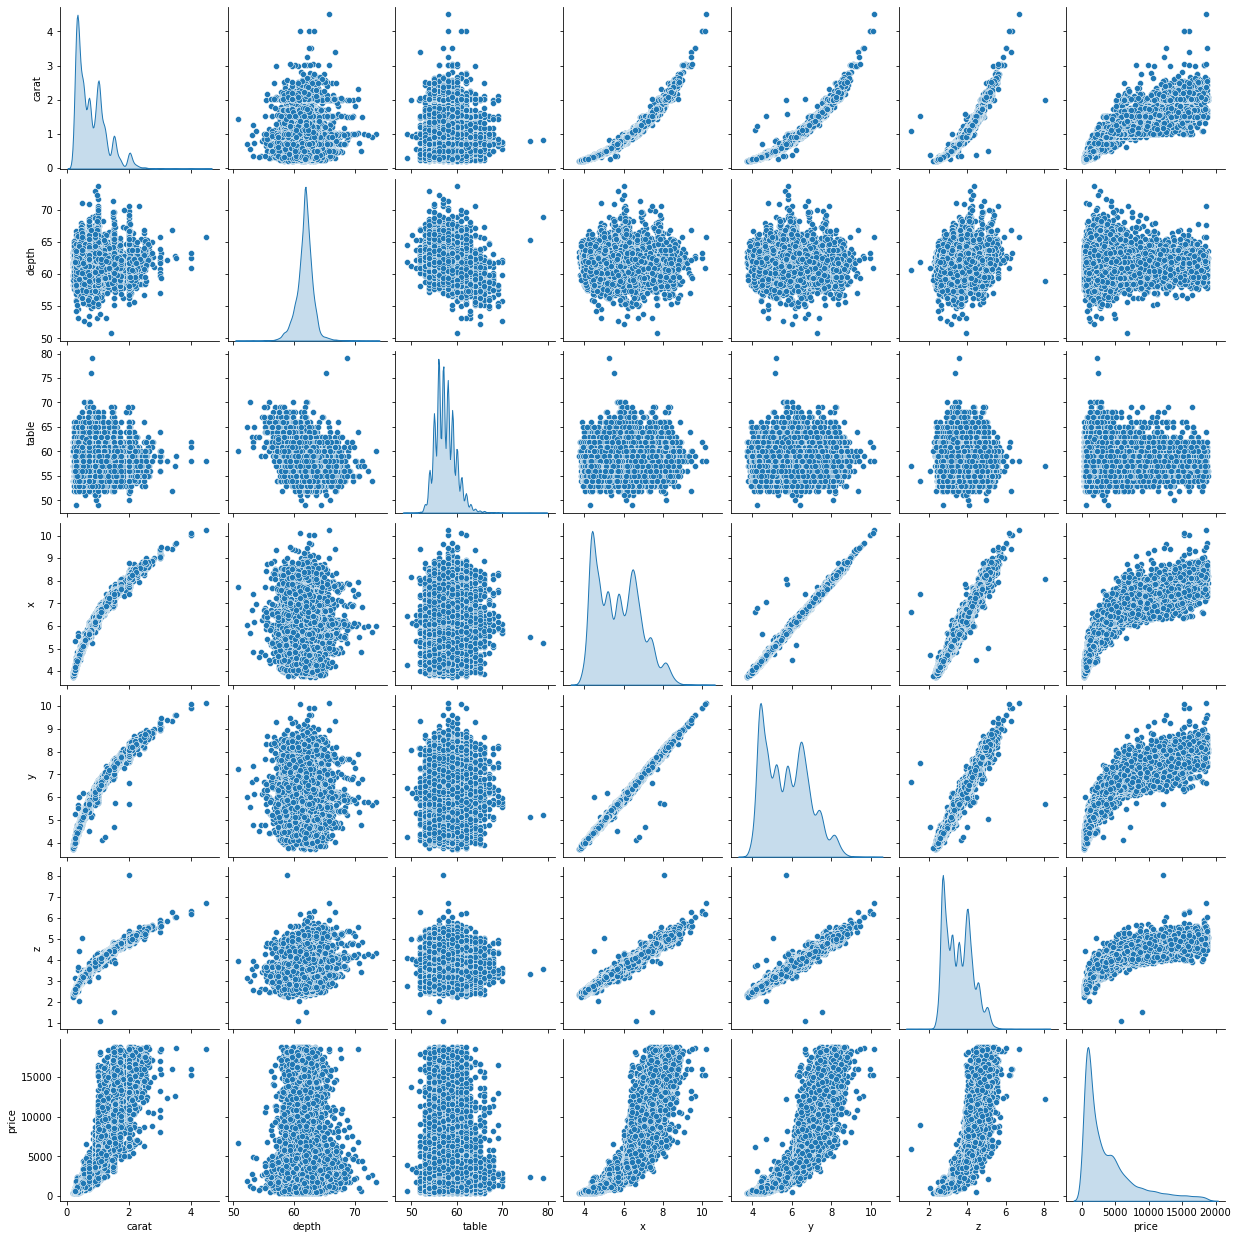

In [52]:
sns.pairplot(df,diag_kind='kde')

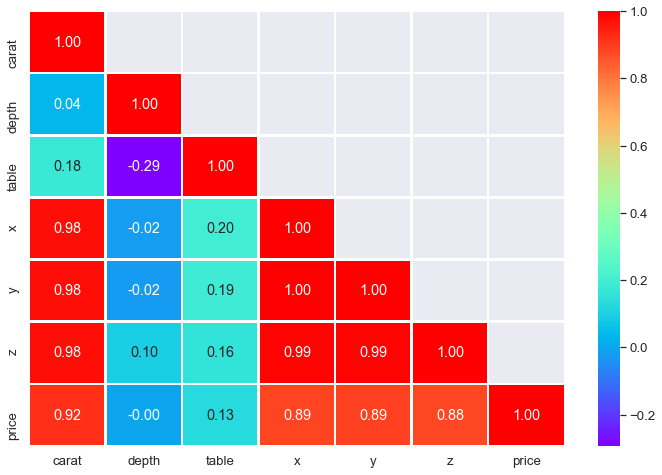

In [53]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',linewidths=1.5,mask=np.triu(df.iloc[:,0:10].corr(),+1))
plt.show()

## Outliers Proportions

In [49]:
def proportion_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [50]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=proportion_outlier(df[column])
#         print(column)
#         print(lr)
#         print(ur)
        # df[(df['price']<-5667.0) & (df['price']>11965.0)].count()
# x=df[df['price'] > 11965.0].count()['price']
        x=df[df[column] < lr].count()[column]
        y=df[df[column] > ur].count()[column]
#         z[column]=(x + y)/df.shape[0]
        print((x + y)/df.shape[0])
#         print(i)  
     

0.024326833797585885
0.05240482822655525
0.011773444753946146
0.0004456824512534819
0.0004085422469823584
0.0004828226555246054
0.06599814298978644


In [51]:
data = pd.DataFrame([[0.024326833797585885],[0.05240482822655525],[0.011773444753946146],[0.0004456824512534819],[0.0004456824512534819],[0.0005199628597957289],[0.06599814298978644]],columns = ['outlier proprotion %'],
                    index = ['carat', 'depth', 'table', 'x', 'y', 'z','price'])
round(data*100,2)

,outlier proprotion %
carat,2.43
depth,5.24
table,1.18
x,0.04
y,0.04
z,0.05
price,6.60


In [ ]:
# plt.figure(figsize=(10,10))
# df.boxplot(vert=0)
# plt.title('With Outliers',fontsize=16)
# plt.show()

In [ ]:
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range

In [ ]:
# for column in df.columns:
#     if df[column].dtype != 'object':
#         lr,ur=remove_outlier(df[column])
#         df[column]=np.where(df[column]>ur,ur,df[column])
#         df[column]=np.where(df[column]<lr,lr,df[column])

In [ ]:
# plt.figure(figsize=(10,10))
# df.boxplot(vert=0)
# plt.title('After Outlier Removal',fontsize=16)
# plt.show()

**log price**

Text(0.5, 1.0, 'Histogram for Price')

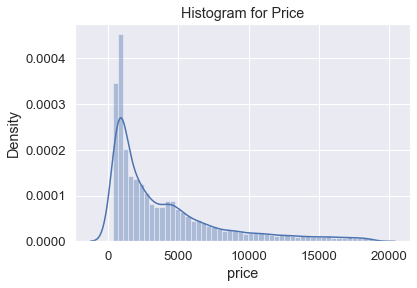

In [54]:
sns.distplot(df.price)
plt.title('Histogram for Price')

In [55]:
# log_df['log_price'] = np.log(df['price'])
df["price_log"] = np.log(df["price"])

Text(0.5, 1.0, 'Histogram for Log Price')

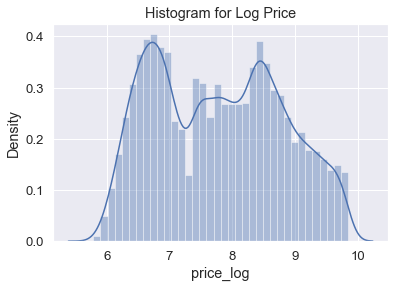

In [56]:
sns.distplot(df.price_log)
plt.title('Histogram for Log Price')

**Combining sub levels**

In [57]:
df['cut']=np.where(df['cut'] =='Very Good', 'Good', df['cut'])
df['clarity'] = df['clarity'].replace({'VVS1': 'VVS', 'VVS2': 'VVS', 'VS1': 'VS','VS2': 'VS', 'SI1': 'SI','SI2': 'SI'})

In [58]:
# df.to_csv('hello.csv')

In [59]:
print('cut:', df.cut.value_counts())
print('--------')
print('color:', df.color.value_counts())
print('--------')
print('clarity:', df.clarity.value_counts())

cut: Ideal      10805
Good        8461
Premium     6880
Fair         779
Name: cut, dtype: int64
--------
color: G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64
--------
clarity: SI     11125
VS     10178
VVS     4369
IF       891
I1       362
Name: clarity, dtype: int64


### Converting categorical to dummy variables

In [ ]:
# df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [ ]:
# df.head()

## Ordinal - Hard coding

In [60]:
# df['cut'] = df['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3,'Premium': 4, 'Ideal': 5})
df['cut'] = df['cut'].replace({'Fair': 1, 'Good': 2, 'Premium': 3, 'Ideal': 4})
df['color'] = df['color'].replace({'D': 1, 'E': 2, 'F': 3,'G': 4, 'H': 5,'I': 6,'J': 7})
# df['clarity'] = df['clarity'].replace({'IF': 1, 'VVS1': 2, 'VVS2': 3,'VS1': 4, 'VS2': 5,'SI1': 6,'SI2': 7,'I1': 8})
df['clarity'] = df['clarity'].replace({'IF': 1, 'VVS': 2, 'VS': 3,'SI': 4, 'I1': 5})

 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
 Colour of the cubic zirconia.With D being the worst and J the best.
Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
clarity: SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362

In [ ]:
# df['cut'] = df['cut'].astype('int64')
# df['color'] = df['color'].astype('int64')
# df['clarity'] = df['clarity'].astype('int64')

**1.2. Impute null values if present; also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.**

* Null values imputed with mode for depth, above.
* x, y, z are ==0, dropped those, above. No meaning, very less proprotion, lets drop.


**1.3	Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.clusters.**

In [61]:
scaled_df=df.copy()

In [62]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.200000,0.400000,0.70000,1.050000,4.500000
cut,26925.0,3.029192,0.911291,1.000000,2.000000,3.00000,4.000000,4.000000
color,26925.0,3.604977,1.706043,1.000000,2.000000,4.00000,5.000000,7.000000
clarity,26925.0,3.211625,0.846663,1.000000,3.000000,3.00000,4.000000,5.000000
depth,26925.0,61.746982,1.393457,50.800000,61.100000,61.80000,62.500000,73.600000
table,26925.0,57.455305,2.231327,49.000000,56.000000,57.00000,59.000000,79.000000
x,26925.0,5.729385,1.126081,3.730000,4.710000,5.69000,6.550000,10.230000
y,26925.0,5.731176,1.117804,3.710000,4.710000,5.70000,6.540000,10.160000
z,26925.0,3.537770,0.696503,1.070000,2.900000,3.52000,4.040000,8.060000
price,26925.0,3936.249991,4020.983187,326.000000,945.000000,2373.00000,5353.000000,18818.000000


In [63]:

sc = StandardScaler()
# get numeric data
n_df = scaled_df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
scaled_df[n_df.columns] = sc.fit_transform(n_df)

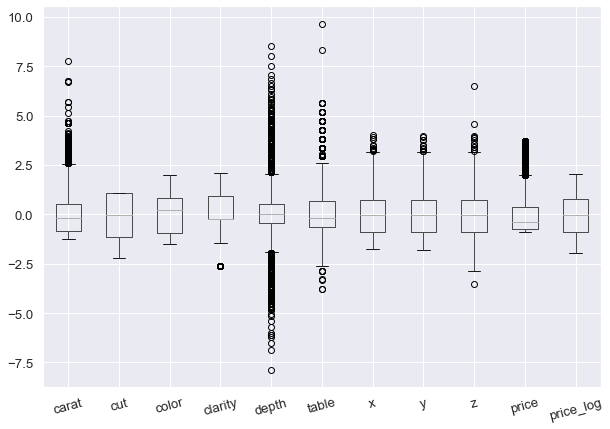

In [64]:
# df.columns
plt.figure(figsize=(10,7))
scaled_df.boxplot()
plt.xticks(rotation = 15) 
plt.show()

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.200000,0.400000,0.70000,1.050000,4.500000
cut,26925.0,3.029192,0.911291,1.000000,2.000000,3.00000,4.000000,4.000000
color,26925.0,3.604977,1.706043,1.000000,2.000000,4.00000,5.000000,7.000000
clarity,26925.0,3.211625,0.846663,1.000000,3.000000,3.00000,4.000000,5.000000
depth,26925.0,61.746982,1.393457,50.800000,61.100000,61.80000,62.500000,73.600000
table,26925.0,57.455305,2.231327,49.000000,56.000000,57.00000,59.000000,79.000000
x,26925.0,5.729385,1.126081,3.730000,4.710000,5.69000,6.550000,10.230000
y,26925.0,5.731176,1.117804,3.710000,4.710000,5.70000,6.540000,10.160000
z,26925.0,3.537770,0.696503,1.070000,2.900000,3.52000,4.040000,8.060000
price,26925.0,3936.249991,4020.983187,326.000000,945.000000,2373.00000,5353.000000,18818.000000


In [67]:
df.dtypes

carat        float64
cut            int64
color          int64
clarity        int64
depth        float64
table        float64
x            float64
y            float64
z            float64
price          int64
price_log    float64
dtype: object

In [68]:
# Copy all the predictor variables into X dataframe
X = df.drop(['price','price_log'], axis=1)

# Copy target into the y dataframe. 
y = df[['price','price_log']]

In [69]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,2,4,62.1,58.0,4.27,4.29,2.66
1,0.33,3,4,1,60.8,58.0,4.42,4.46,2.70
2,0.90,2,2,2,62.2,60.0,6.04,6.12,3.78
3,0.42,4,3,3,61.6,56.0,4.82,4.80,2.96
4,0.31,4,3,2,60.4,59.0,4.35,4.43,2.65


In [70]:
y.head()

,price,price_log
0,499,6.212606
1,984,6.891626
2,6289,8.746557
3,1082,6.986566
4,779,6.658011


In [71]:
# Split X and y into training and test set in 70:30 ratio
 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
# y_train

### Linear Regression Model

In [72]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train['price_log'])

LinearRegression()

In [73]:
regression_model.coef_

array([-1.1001126 ,  0.03010367, -0.07528224, -0.22314266,  0.04147359,
        0.00831849,  0.64056334,  0.56685215,  0.35113392])

In [74]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [75]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, round(regression_model.coef_[idx],4)))

The coefficient for carat is -1.1001
The coefficient for cut is 0.0301
The coefficient for color is -0.0753
The coefficient for clarity is -0.2231
The coefficient for depth is 0.0415
The coefficient for table is 0.0083
The coefficient for x is 0.6406
The coefficient for y is 0.5669
The coefficient for z is 0.3511


In [76]:
predictors = X_train.columns
coef = Series(regression_model.coef_,predictors)
#     print(coef)
# regression_model.coef_[0]


<AxesSubplot:title={'center':'Model Coefficients'}>

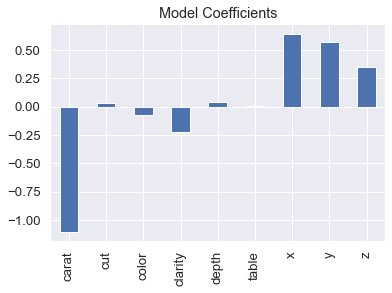

In [77]:
coef.plot(kind='bar', title='Model Coefficients')


In [78]:
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.643979219811147


In [79]:
# R square on training data
regression_model.score(X_train, y_train['price_log'])

0.9768429644272729

In [80]:
# R square on testing data
regression_model.score(X_test, y_test['price_log'])

0.9768047055074744

In [81]:
# y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
# y_train
# y_train_Price = y_train["Price"]
rmfit=regression_model.fit(X_train, y_train['price_log'])

In [82]:
#RMSE on Training data
predicted_train=rmfit.predict(X_train)
orig_price_train=np.exp(predicted_train)
print('RMSE for the Train data is:',np.sqrt(metrics.mean_squared_error(y_train['price'],orig_price_train)))
#RMSE on Testing data
predicted_test=rmfit.predict(X_test)
orig_price_test=np.exp(predicted_test)
# orig_price_test
print('RMSE for the Train data is:',np.sqrt(metrics.mean_squared_error(y_test['price'],orig_price_test)))

RMSE for the Train data is: 924.9747714733946
RMSE for the Train data is: 940.955300876988


In [ ]:
# #RMSE on Training data
# predicted_train=regression_model.fit(X_train, y_train['price_log']).predict(X_train)
# orig_price=np.exp(predicted_train)
# np.sqrt(metrics.mean_squared_error(y_train['price'],predicted_train))


In [ ]:
# #RMSE on Testing data
# predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
# orig_price=np.exp(predicted_test)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
# y_test.mean()

In [ ]:
# # y_pred_train_pricelog = olsmodel.predict(x_train)

# y_train
# predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train))



### Linear Regression using statsmodels

In [83]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [84]:
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,price_log
5030,1.10,2,2,4,63.3,56.0,6.53,6.58,4.15,4065,8.310169
12108,1.01,2,1,4,64.0,56.0,6.30,6.38,4.06,5166,8.549854
20181,0.67,2,6,3,60.7,61.4,5.60,5.64,3.41,1708,7.443078
4712,0.76,2,4,4,57.7,63.0,6.05,5.97,3.47,2447,7.802618
2548,1.01,3,4,3,62.8,59.0,6.37,6.34,3.99,6618,8.797548


In [ ]:
# data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [85]:
# expr='price ~ carat+cut+color+clarity+depth+table+x+y+z'
# expr='price ~ carat+ depth+ table+ x+ y+ z+ cut_Good+ cut_Ideal+cut_Premium+ cut_Very_Good+ color_E+ color_F+ color_G+color_H+ color_I+ color_J+ clarity_IF+ clarity_SI1+clarity_SI2+ clarity_VS1+ clarity_VS2+ clarity_VVS1+clarity_VVS2'
# expr='price ~ carat+ depth+ table+ x+ y+ z+ cut_Ideal+cut_Premium+ cut_Very_Good+ color_E+ color_F+ color_G+color_H+ color_I+ color_J+ clarity_IF+ clarity_SI1+clarity_SI2+ clarity_VS1+ clarity_VS2+ clarity_VVS1+clarity_VVS2'
expr='price_log ~ carat+cut+color+clarity+depth+table+x+y+z'

In [ ]:
# x_test

In [86]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -1.643979
carat       -1.100113
cut          0.030104
color       -0.075282
clarity     -0.223143
depth        0.041474
table        0.008318
x            0.640563
y            0.566852
z            0.351134
dtype: float64

In [87]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 8.829e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:50:54   Log-Likelihood:                 8439.1
No. Observations:               18847   AIC:                        -1.686e+04
Df Residuals:                   18837   BIC:                        -1.678e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6440      0.121    -13.604      0.0

In [88]:
# data_train
iv_data_train=data_train.drop(['price','price_log'],axis=1)

In [89]:
pred_log_price=lm1.predict(iv_data_train)
log_orig_price_train=np.exp(pred_log_price)

In [90]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases
mse = np.mean((log_orig_price_train-data_train['price'])**2)

In [91]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
#RMSE on Training data
import math

math.sqrt(mse)

924.9747714733649

In [215]:
# MAE
np.mean(np.abs(log_orig_price_train-data_train['price']))

496.08577784667887

In [214]:
# lm1.predict(x_test)
# MAPE
np.mean(np.abs((log_orig_price_train-data_train['price'])/log_orig_price_train)*100)

12.199529516840972

In [92]:
iv_data_test=data_test.drop(['price','price_log'],axis=1)

In [93]:
pred_log_price_test=lm1.predict(iv_data_test)
log_orig_price_test=np.exp(pred_log_price_test)

In [94]:
mse = np.mean((log_orig_price_test-data_test['price'])**2)
math.sqrt(mse)

940.9553008769709

In [216]:
# MAE
np.mean(np.abs(log_orig_price_test-data_test['price']))

500.5950550099992

In [217]:
# MAPE
np.mean(np.abs((log_orig_price_test-data_test['price'])/log_orig_price_test)*100)

12.227167343182494

In [95]:
# Prediction on Test data
y_pred = lm1.predict(iv_data_test)

Text(0, 0.5, 'Predicted Price')

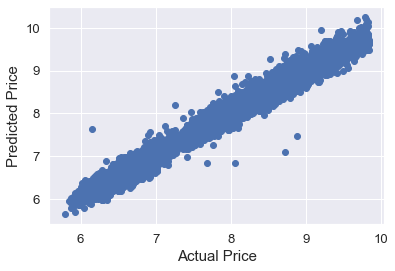

In [96]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500

plt.scatter(y_test['price_log'], y_pred)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)

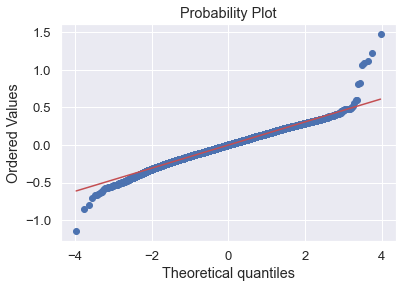

In [97]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(lm1.resid, dist="norm", plot=pylab)
plt.show()

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

### Checking Assumption 1: No Multicollinearity 

In [98]:
df1=df.copy()
scaled_df=X.copy()

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# get numeric data
n_df = scaled_df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
scaled_df[n_df.columns] = sc.fit_transform(n_df)

In [103]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = [variance_inflation_factor(scaled_df.values, ix) for ix in range(scaled_df.shape[1])] 
# i=0
# for column in scaled_df.columns:
#     if i < 10:
#         print (column ,"--->",  vif[i])
#         i = i+1

In [104]:
pd.DataFrame([variance_inflation_factor(scaled_df.values, i) 
               for i in range(scaled_df.shape[1])], 
              index=scaled_df.columns)

,0
carat,25.166938
cut,1.484473
color,1.114907
clarity,1.208717
depth,4.784497
table,1.632172
x,445.923678
y,362.487239
z,250.463098


In [ ]:
# df1.dtypes

In [105]:
df1.drop('depth',axis=1,inplace=True)

In [106]:
# We will have to create the x and y datasets again
ind_vars = df1.drop(["price", "price_log"], axis=1)
dep_var = df1[["price_log", "price"]]


# Splitting data into train and test
tx_train, tx_test, ty_train, ty_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

print("Number of rows in train data =", tx_train.shape[0])
print("Number of rows in train data =", tx_test.shape[0], "\n\n")

Number of rows in train data = 18847
Number of rows in train data = 8078 




In [107]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
tx_train = sm.add_constant(tx_train)
# Add constant to test data
tx_test = sm.add_constant(tx_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(ty_train["price_log"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(tx_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.613e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:03:47   Log-Likelihood:                 8138.1
No. Observations:               18847   AIC:                        -1.626e+04
Df Residuals:                   18838   BIC:                        -1.619e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1431      0.044     25.819      0.0

In [108]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, tx_train, tx_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(tx_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = ty_train["price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(tx_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = ty_test["price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, tx_train, tx_test)  # High Overfitting.

    Data        RMSE         MAE       MAPE
0  Train  987.380381  497.671896  12.333218
1   Test  949.821474  501.572188  12.398176


In [213]:
lm1.m

Intercept   -1.643979
carat       -1.100113
cut          0.030104
color       -0.075282
clarity     -0.223143
depth        0.041474
table        0.008318
x            0.640563
y            0.566852
z            0.351134
dtype: float64

## Checking Assumption 2: Mean of residuals should be 0


In [109]:
residuals = lm1.resid
np.mean(residuals)

-1.1661207245637731e-13

In [ ]:
# print(olsmodel1.summary())

## Assumption 3 : No Heteroscedasticity

In [ ]:
# tx_train

In [110]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9851908908348033), ('p-value', 0.7654062186137036)]

## Assumption 4 : Linearity of variables

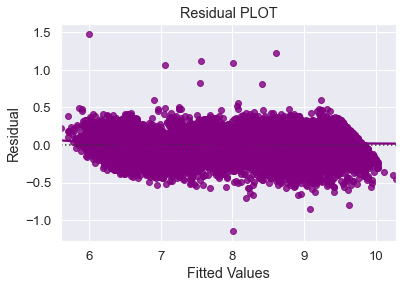

In [111]:
# predicted values
residuals = lm1.resid
fitted = lm1.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

## Assumption 5: Normality of error terms

<AxesSubplot:ylabel='Count'>

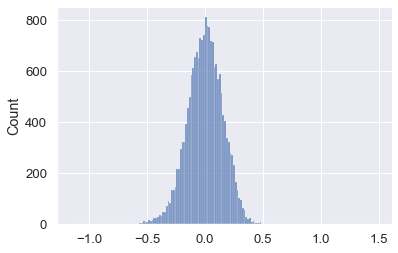

In [112]:
#residuals are normal
sns.histplot(lm1.resid)

In [113]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1.64) * Intercept + (-1.1) * carat + (0.03) * cut + (-0.08) * color + (-0.22) * clarity + (0.04) * depth + (0.01) * table + (0.64) * x + (0.57) * y + (0.35) * z + 

## PROBLEM 2

##  Logistic Regression and LDA

In [114]:
hdf=pd.read_csv('Holiday_Package.csv')

In [115]:
hdf.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [116]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [117]:
dups = hdf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
hdf[dups]

Number of duplicate rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [118]:
hdf=hdf.drop('Unnamed: 0',axis=1)

In [119]:
hdf.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [120]:
hdf.rename(columns = {'Holliday_Package' : 'Holiday_Package'}, inplace = True)

In [121]:
hdf.columns

Index(['Holiday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [122]:
hdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [123]:
hdf.Salary.mean()

47729.172018348625

In [124]:
hdf['Salary']=hdf['Salary'].replace(1322.0,47729.172018348625)

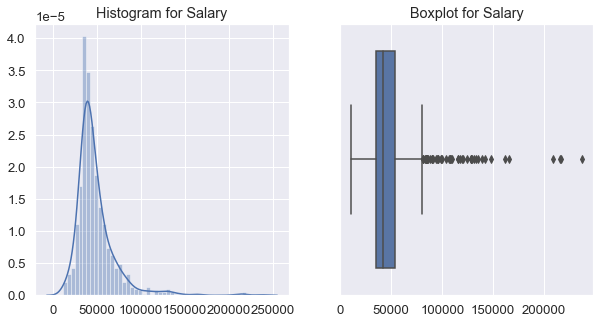

In [125]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(hdf.Salary,kde=True,ax=ax[0])
sns.boxplot(x='Salary',data=hdf,ax=ax[1])
ax[0].set_title('Histogram for Salary')
ax[1].set_title('Boxplot for Salary')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

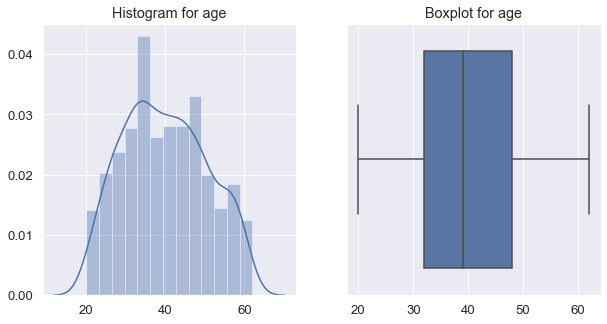

In [126]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(hdf.age,kde=True,ax=ax[0])
sns.boxplot(x='age',data=hdf,ax=ax[1])
ax[0].set_title('Histogram for age')
ax[1].set_title('Boxplot for age')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

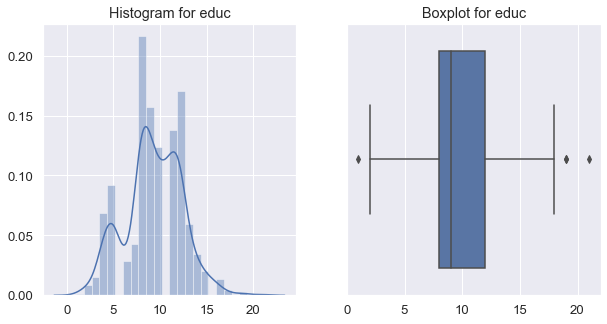

In [127]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(hdf.educ,kde=True,ax=ax[0])
sns.boxplot(x='educ',data=hdf,ax=ax[1])
ax[0].set_title('Histogram for educ')
ax[1].set_title('Boxplot for educ')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

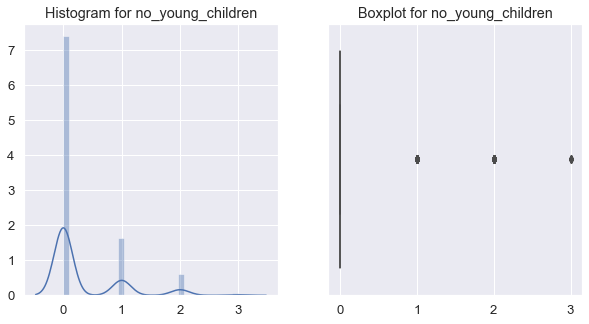

In [128]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(hdf.no_young_children,kde=True,ax=ax[0])
sns.boxplot(x='no_young_children',data=hdf,ax=ax[1])
ax[0].set_title('Histogram for no_young_children')
ax[1].set_title('Boxplot for no_young_children')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

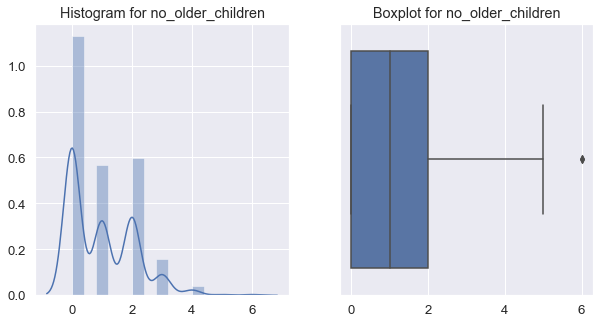

In [129]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(hdf.no_older_children,kde=True,ax=ax[0])
sns.boxplot(x='no_older_children',data=hdf,ax=ax[1])
ax[0].set_title('Histogram for no_older_children')
ax[1].set_title('Boxplot for no_older_children')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

In [130]:
def proportion_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [131]:
for column in hdf.columns:
    if hdf[column].dtype != 'object':
        lr,ur=proportion_outlier(hdf[column])
        x=hdf[hdf[column] < lr].count()[column]
        y=hdf[hdf[column] > ur].count()[column]
        print((x + y)/hdf.shape[0])

0.06422018348623854
0.0
0.0045871559633027525
0.23738532110091742
0.0022935779816513763


In [132]:
data = pd.DataFrame([[0.06422018348623854],[0.0],[0.0045871559633027525],[0.23738532110091742],[0.0022935779816513763]],columns = ['outlier proprotion %'],
                    index = ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'])
round(data*100,2)

,outlier proprotion %
Salary,6.42
age,0.00
educ,0.46
no_young_children,23.74
no_older_children,0.23


In [133]:
for i in hdf.columns:
    if (hdf[i].dtype != 'object'):
        print("Skewness for", i,"is: ",round(hdf[i].skew(),2))

Skewness for Salary is:  3.13
Skewness for age is:  0.15
Skewness for educ is:  -0.05
Skewness for no_young_children is:  1.95
Skewness for no_older_children is:  0.95


In [134]:
print('Holiday_Package:', hdf.Holiday_Package.value_counts())
print('--------')
print('foreign:', hdf.foreign.value_counts())

Holiday_Package: no     471
yes    401
Name: Holiday_Package, dtype: int64
--------
foreign: no     656
yes    216
Name: foreign, dtype: int64


In [135]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 47.8+ KB


In [ ]:
# sns.countplot(x="foreign", data=hdf,color_palette='tab10')

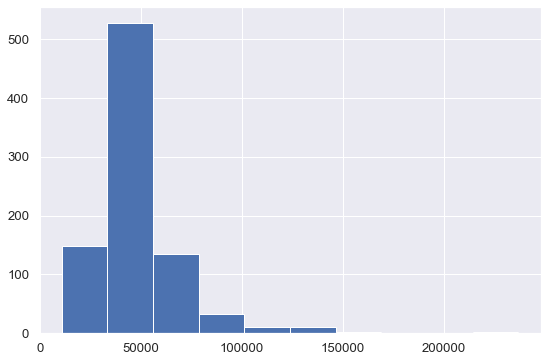

In [136]:
plt.figure(figsize = (9,6))
hdf['Salary'].hist()
plt.show()

<AxesSubplot:xlabel='Holiday_Package', ylabel='Salary'>

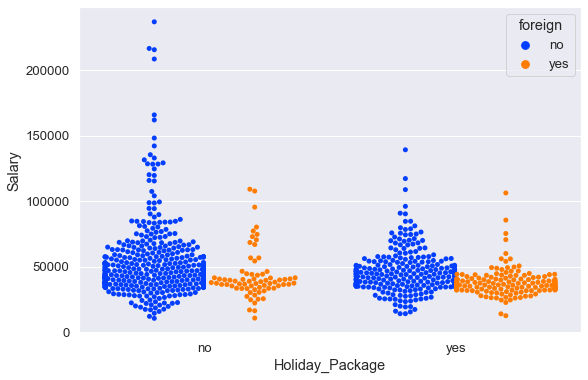

In [137]:
plt.figure(figsize = (9,6))
sns.swarmplot(x='Holiday_Package',y='Salary',hue='foreign',data=hdf,palette='bright',dodge=True)
# <80K always opting the package and foreign very less

In [138]:
act = pd.crosstab(hdf['foreign'],hdf['Holiday_Package'], margins=True,normalize=True )
act

Holiday_Package,no,yes,All
foreign,,,
no,0.461009,0.291284,0.752294
yes,0.079128,0.168578,0.247706
All,0.540138,0.459862,1.000000


In [139]:
act = pd.crosstab(hdf['no_young_children'],hdf['Holiday_Package'], margins=True,normalize=True )
act

Holiday_Package,no,yes,All
no_young_children,,,
0,0.373853,0.388761,0.762615
1,0.114679,0.053899,0.168578
2,0.048165,0.014908,0.063073
3,0.003440,0.002294,0.005734
All,0.540138,0.459862,1.000000


<AxesSubplot:xlabel='Holiday_Package', ylabel='age'>

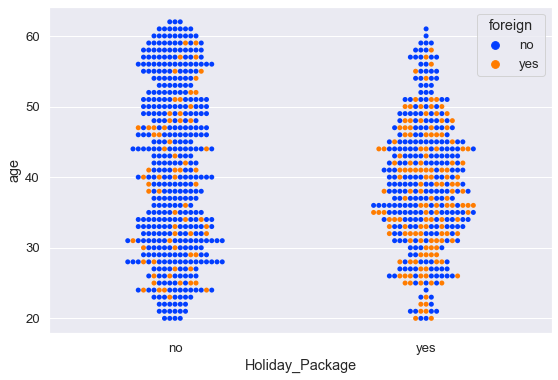

In [141]:
plt.figure(figsize = (9,6))
sns.swarmplot(x='Holiday_Package',y='age',hue='foreign',data=hdf,palette='bright')


In [142]:
hdf1=hdf.copy()
hdf1['age_category']=pd.cut(x=hdf['age'],bins=[20,25,35,50,60],labels=['young','adults','mid-age','seniors'])

<AxesSubplot:xlabel='Holiday_Package', ylabel='count'>

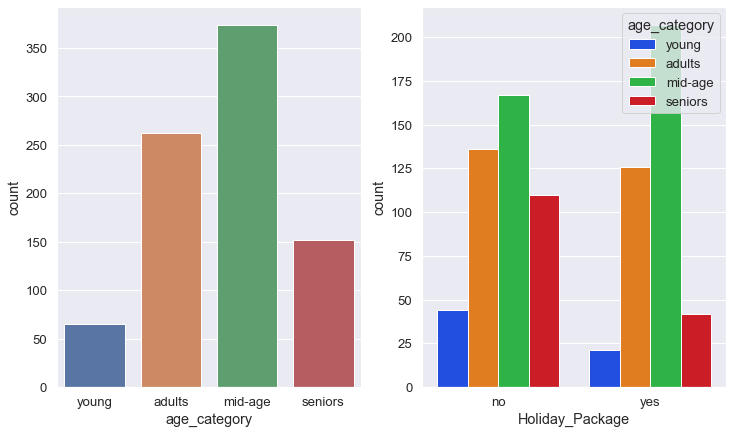

In [143]:
f,ax=plt.subplots(1,2,figsize=(12,7))
# sns.distplot(hdf.Salary,kde=True,ax=ax[0])
# sns.boxplot(x='Salary',data=hdf,ax=ax[1])
sns.countplot(x='age_category',data=hdf1,ax=ax[0])
sns.countplot(x='Holiday_Package',hue='age_category',data=hdf1,ax=ax[1],palette='bright')

<AxesSubplot:xlabel='Holiday_Package', ylabel='no_older_children'>

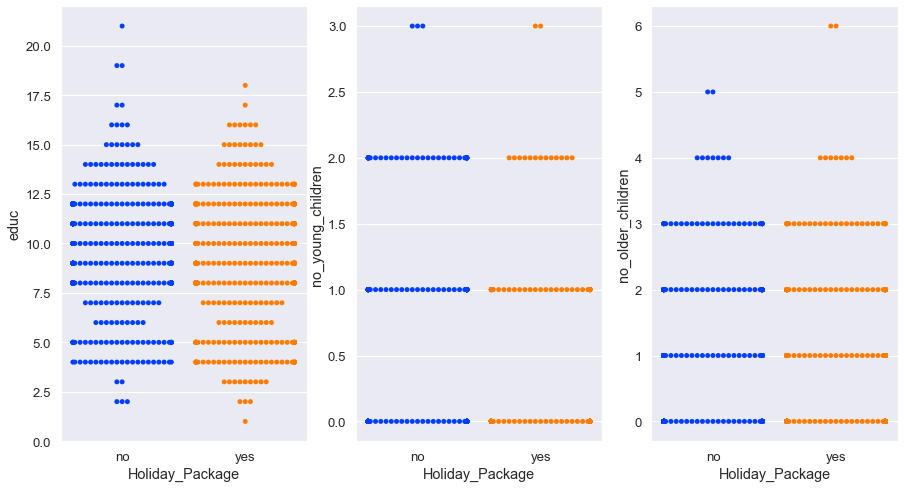

<Figure size 648x432 with 0 Axes>

In [144]:
f,ax=plt.subplots(1,3,figsize=(15,8))
plt.figure(figsize = (9,6))
sns.swarmplot(x='Holiday_Package',y='educ',data=hdf,ax=ax[0],palette='bright')
sns.swarmplot(x='Holiday_Package',y='no_young_children',data=hdf,ax=ax[1],palette='bright')
sns.swarmplot(x='Holiday_Package',y='no_older_children',data=hdf,ax=ax[2],palette='bright')

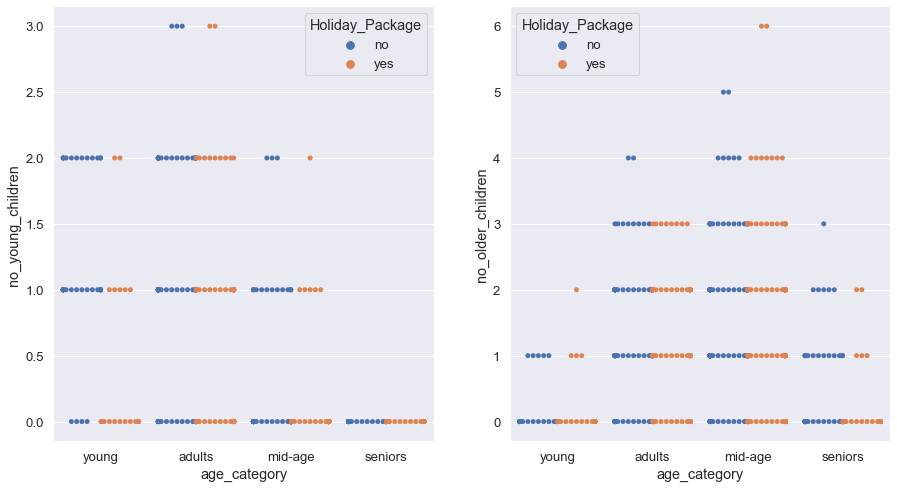

<Figure size 648x432 with 0 Axes>

In [145]:
f,ax=plt.subplots(1,2,figsize=(15,8))
plt.figure(figsize = (9,6))
sns.swarmplot(x='age_category',y='no_young_children',hue='Holiday_Package',dodge=True,data=hdf1,ax=ax[0]);
sns.swarmplot(x='age_category',y='no_older_children',hue='Holiday_Package',dodge=True,data=hdf1,ax=ax[1]);
plt.show()

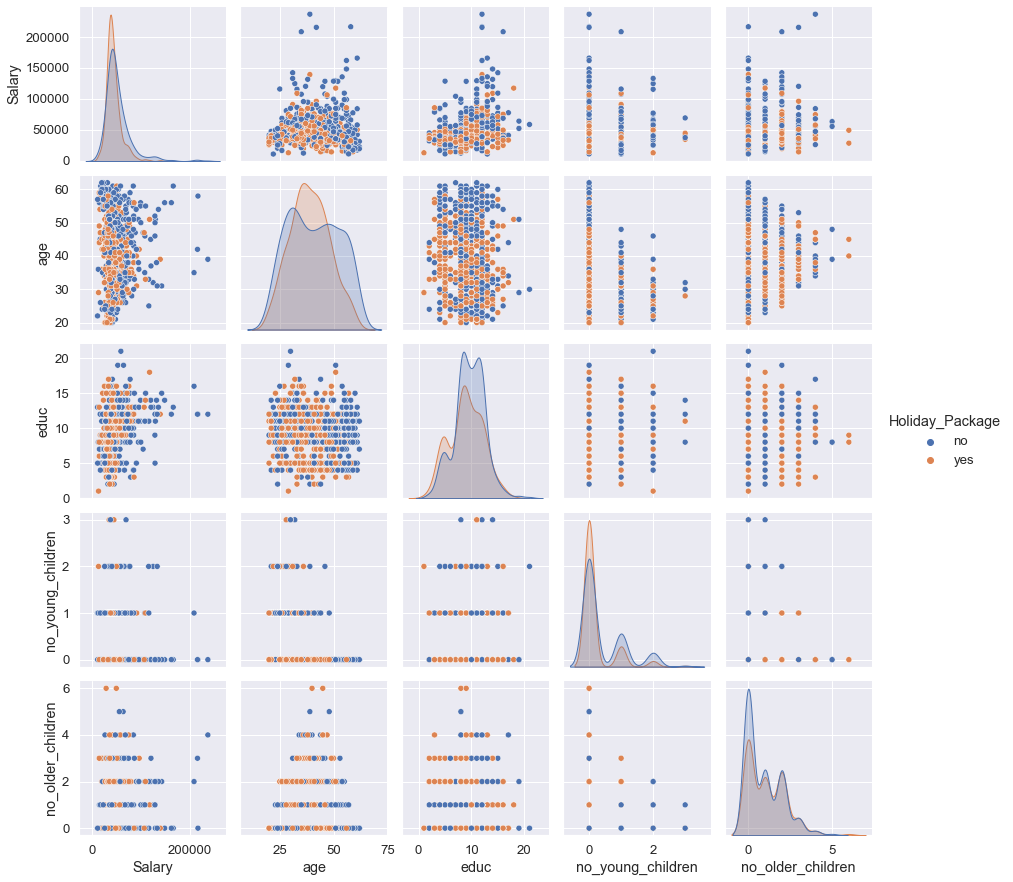

In [146]:
sns.pairplot(hdf,hue='Holiday_Package' , diag_kind = 'kde')

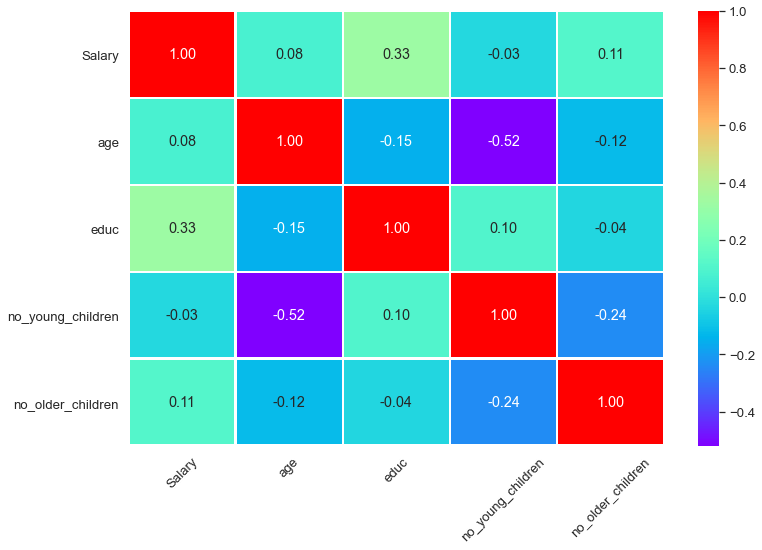

In [147]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.heatmap(hdf.corr(),annot=True,fmt='.2f',cmap='rainbow',linewidths=1.5)
plt.xticks(rotation=45)

plt.show()

In [148]:
hdf.dtypes

Holiday_Package       object
Salary               float64
age                    int64
educ                   int64
no_young_children      int64
no_older_children      int64
foreign               object
dtype: object

In [149]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [150]:
hdf['Holiday_Package'] = LE.fit_transform(hdf['Holiday_Package'])

In [ ]:
## Converting the other 'object' type variables as dummy variables
# hdf_dummy = pd.get_dummies(hdf,columns=['foreign'])
# data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [151]:
hdf['foreign']= pd.Categorical(hdf['foreign']).codes
# print(pd.Categorical(hdf['foreign'].unique()))
# print(pd.Categorical(hdf['foreign'].unique()).codes)
# for feature in hdf.columns: 
#     if cart_df[feature].dtype == 'object': 
#         print('\n')
#         print('feature:',feature)
#         print(pd.Categorical(cart_df[feature].unique()))
#         print(pd.Categorical(cart_df[feature].unique()).codes)
#         cart_df[feature] = pd.Categorical(cart_df[feature]).codes

In [152]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    int32  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int8   
dtypes: float64(1), int32(1), int64(4), int8(1)
memory usage: 38.4 KB


In [153]:
hdf.head()

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [154]:
# Copy all the predictor variables into X dataframe
X = hdf.drop(['Holiday_Package'], axis=1)

# Copy target into the y dataframe. 
y = hdf[['Holiday_Package']]

In [155]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=hdf['Holiday_Package'])

In [156]:
X_test.shape

(262, 6)

In [157]:
y_train.value_counts(normalize=True)

Holiday_Package
0                  0.539344
1                  0.460656
dtype: float64

In [158]:
y_test.value_counts(normalize=True)

Holiday_Package
0                  0.541985
1                  0.458015
dtype: float64

In [159]:
# # Fit the Logistic Regression model
# model = LogisticRegression(max_iter=10000,penalty='none',verbose=True,n_jobs=2)
# model.fit(X_train, y_train)

In [160]:
lgt_model=LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)

In [ ]:
# max_iter=10000,penalty='none',verbose=True,n_jobs=2

In [161]:
param_grid = {
    'solver': ['lbfgs','newton-cg','liblinear'],
    'penalty' : ['l1', 'l2', 'none'],
    'tol': [0.0001,0.000001] 
}

lgtcl = LogisticRegression(random_state=1)

grid_search = GridSearchCV(estimator = lgt_model, param_grid = param_grid,scoring='f1', cv = 3)

In [162]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [163]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [164]:
grid_search.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')

In [165]:
model=grid_search.best_estimator_

In [166]:
# model
## calculating coefficients
coeff = DataFrame(X_train.columns)

In [167]:
coeff['Coefficient'] = model.coef_[0]

In [168]:
coeff

,0,Coefficient
0,Salary,-0.000016
1,age,-0.049031
2,educ,0.068478
3,no_young_children,-1.218315
4,no_older_children,-0.010368
5,foreign,1.252361


In [169]:
predictors = X_train.columns

coef = Series(model.coef_[0],predictors).sort_values()
# 
# coef.plot(kind='bar', title='Modal Coefficients')

In [ ]:
# predictors

<AxesSubplot:title={'center':'Model Coefficients'}>

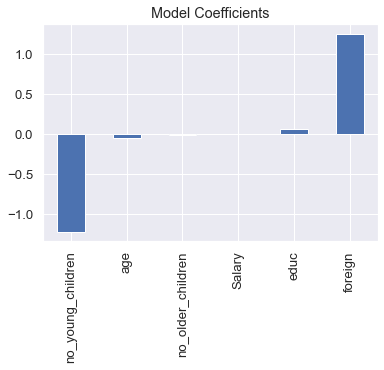

In [170]:
coef.plot(kind='bar', title='Model Coefficients')

### Predicting on Training and Test dataset

In [171]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [172]:
ytest_predict_prob=model.predict_proba(X_test)
# pd.DataFrame(ytest_predict_prob).head()

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
# pd.DataFrame(ytest_predict_prob).head()

In [173]:
# Accuracy - Training Data
round(model.score(X_train, y_train)*100,2)

66.56

In [174]:
log_train_acc=model.score(X_train, y_train)

### AUC and ROC for the training data

AUC: 0.733


Text(0, 0.5, 'True positive Rate')

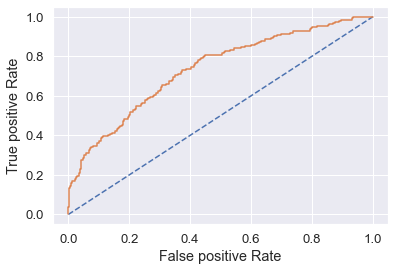

In [175]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
log_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

In [176]:
# Accuracy - Test Data
round(model.score(X_test, y_test)*100,2)

66.03

In [177]:
log_test_acc=model.score(X_test, y_test)

AUC: 0.733


Text(0, 0.5, 'True positive Rate')

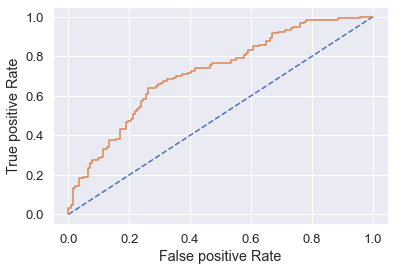

In [178]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

### Confusion Matrix for the training data and testing data


In [179]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

Text(0.5, 19.5, 'Predicted label')

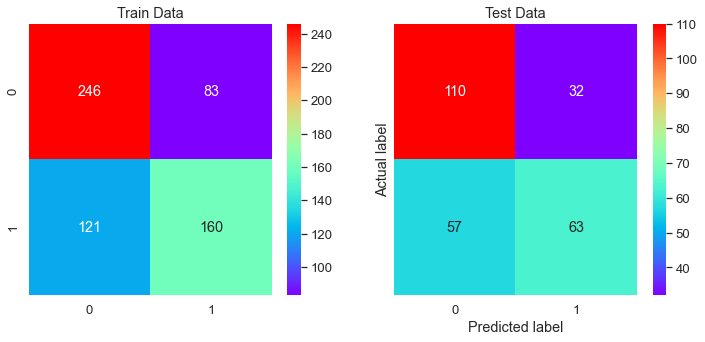

In [180]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Training Data and Test Data Classification Report Comparison

In [181]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



In [183]:
log_metrics=classification_report(y_train,pred_class_train,output_dict=True)
lgdf=pd.DataFrame(log_metrics).transpose()
log_train_f1=round(lgdf.loc["1"][2],2)
log_train_recall=round(lgdf.loc["1"][1],2)
log_train_precision=round(lgdf.loc["1"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)
log_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
lgdf_test=pd.DataFrame(log_metrics_test).transpose()
log_test_precision=round(lgdf_test.loc["1"][0],2)
log_test_recall=round(lgdf_test.loc["1"][1],2)
log_test_f1=round(lgdf_test.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_train_precision  0.66
log_train_recall  0.57
log_train_f1  0.61
log_test_precision  0.66
log_test_recall  0.52
log_test_f1  0.59


### Probability prediction for the training and test data

In [184]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
# pred_prob_train[:,1]

In [185]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
#     plt.figure(figsize=(6,4))
#     print('Confusion Matrix')
#     sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
#     plt.show();

0.1 

Accuracy Score 0.4836
F1 Score 0.6408 

0.2 

Accuracy Score 0.518
F1 Score 0.6475 

0.3 

Accuracy Score 0.5852
F1 Score 0.6667 

0.4 

Accuracy Score 0.6656
F1 Score 0.6792 

0.5 

Accuracy Score 0.6656
F1 Score 0.6107 

0.6 

Accuracy Score 0.6525
F1 Score 0.5138 

0.7 

Accuracy Score 0.6393
F1 Score 0.4054 

0.8 

Accuracy Score 0.5738
F1 Score 0.1447 

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 



In [186]:
threshold=0.4
predicted = (model.predict_proba(X_test)[:,1]>=threshold).astype('int')

In [187]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.54      0.62       142
           1       0.58      0.74      0.65       120

    accuracy                           0.63       262
   macro avg       0.65      0.64      0.63       262
weighted avg       0.65      0.63      0.63       262



In [188]:
log_threshold_test_acc_threshold=model.score(X_test, predicted)

In [189]:
log_threshold_test_auc_threshold = roc_auc_score(y_test, predicted)

In [190]:
log_threshold_metrics=classification_report(y_test, predicted,output_dict=True)
lgtdf=pd.DataFrame(log_threshold_metrics).transpose()
log_threshold_test_precision_threshold=round(lgtdf.loc["1"][0],2)
log_threshold_test_recall_threshold=round(lgtdf.loc["1"][1],2)
log_threshold_test_f1_threshold=round(lgtdf.loc["1"][2],2)
print ('log_threshold_test_precision_threshold',log_threshold_test_precision_threshold)
print ('log_threshold_test_recall_threshold ',log_threshold_test_recall_threshold)
print ('log_threshold_test_f1_threshold ',log_threshold_test_f1_threshold)

log_threshold_test_precision_threshold 0.58
log_threshold_test_recall_threshold  0.74
log_threshold_test_f1_threshold  0.65


## Linear Discriminant Analysis

In [191]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610, 1)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262, 1)


In [192]:
lda = LinearDiscriminantAnalysis()

In [193]:
ldamodel=lda.fit(X_train,y_train)

In [194]:
lda_train_acc=ldamodel.score(X_train, y_train)
lda_train_acc

0.6639344262295082

In [195]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ldamodel.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ldamodel.predict(X_test)

In [196]:
lda_test_acc=ldamodel.score(X_test, y_test)

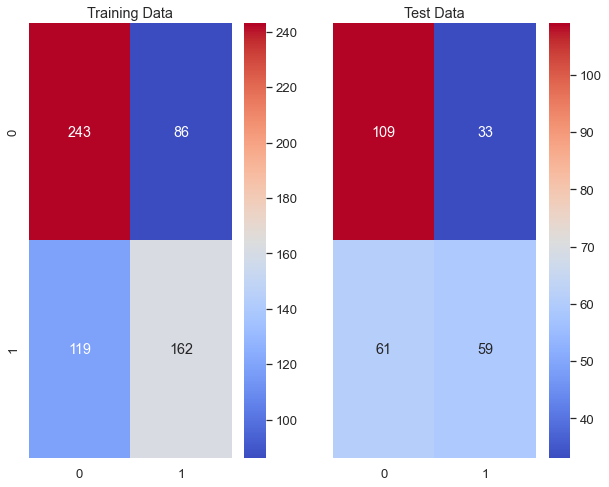

In [197]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(10,8))
# f,ax=plt.subplots(1,2,figsize=(15,7))

# Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

# sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),cmap='coolwarm',annot=True,fmt='.5g');
# plt.title('Train Data');
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

In [198]:
# Training Data Probability Prediction
pred_prob_train = ldamodel.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ldamodel.predict_proba(X_test)

AUC for the Training Data: 0.732


Text(0, 0.5, 'True positive Rate')

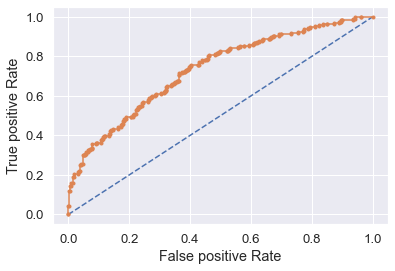

In [199]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
lda_train_auc=roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

AUC for the Test Data: 0.714


Text(0, 0.5, 'True positive Rate')

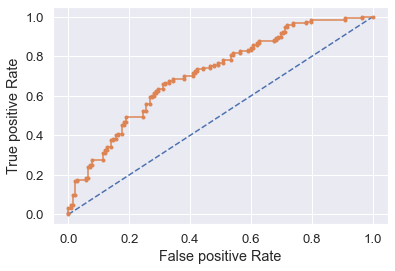

In [200]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
lda_test_auc=metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

In [201]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [202]:
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
ldadf=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(ldadf.loc["1"][2],2)
lda_train_recall=round(ldadf.loc["1"][1],2)
lda_train_precision=round(ldadf.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
ldadf_test=pd.DataFrame(lda_metrics_test).transpose()
lda_test_precision=round(ldadf_test.loc["1"][0],2)
lda_test_recall=round(ldadf_test.loc["1"][1],2)
lda_test_f1=round(ldadf_test.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61
lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


In [203]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

0.2 

Accuracy Score 0.5197
F1 Score 0.6491 

0.3 

Accuracy Score 0.5918
F1 Score 0.6676 

0.4 

Accuracy Score 0.6639
F1 Score 0.6741 

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

0.7 

Accuracy Score 0.6492
F1 Score 0.4368 

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 



In [204]:
threshold=0.4
predicted = (ldamodel.predict_proba(X_test)[:,1]>=threshold).astype('int')

In [205]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262



In [206]:
lda_threshold_test_acc_threshold=ldamodel.score(X_test, predicted)

In [207]:
lda_threshold_test_auc_threshold = roc_auc_score(y_test, predicted)

In [208]:
lda_threshold_metrics=classification_report(y_test, predicted,output_dict=True)
ldadf=pd.DataFrame(lda_threshold_metrics).transpose()
lda_threshold_test_precision_threshold=round(ldadf.loc["1"][0],2)
lda_threshold_test_recall_threshold=round(ldadf.loc["1"][1],2)
lda_threshold_test_f1_threshold=round(ldadf.loc["1"][2],2)
print ('lda_threshold_test_precision_threshold',lda_threshold_test_precision_threshold)
print ('lda_threshold_test_recall_threshold ',lda_threshold_test_recall_threshold)
print ('lda_threshold_test_f1_threshold ',lda_threshold_test_f1_threshold)

lda_threshold_test_precision_threshold 0.59
lda_threshold_test_recall_threshold  0.72
lda_threshold_test_f1_threshold  0.65


In [ ]:
# ****************************************************

Area under the curve for Logistic Regression Classification Model is 0.7183098591549296
Area under the curve for LDA Classification Model is 0.7140258215962442


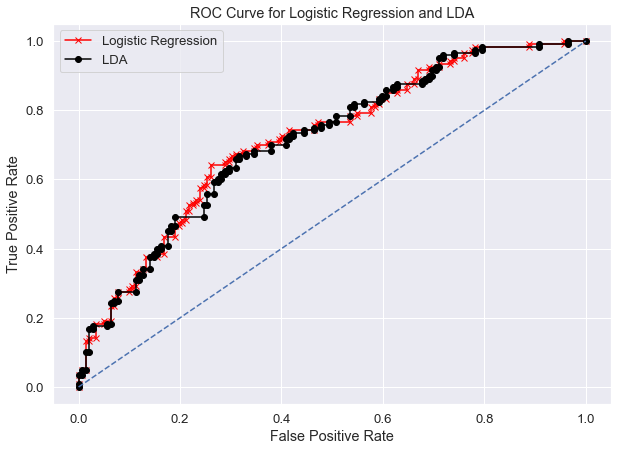

In [209]:
models_names={model:'Logistic Regression',ldamodel:'LDA'}

print('Area under the curve for Logistic Regression Classification Model is',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
print('Area under the curve for LDA Classification Model is',roc_auc_score(y_test,ldamodel.predict_proba(X_test)[:,1]))

plt.figure(figsize=(10,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='red') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,ldamodel.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='black') 

# fpr_ann, tpr_ann, thresholds = roc_curve(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1])
# plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression and LDA'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()



In [ ]:
# clf2 = QuadraticDiscriminantAnalysis()
# model2=clf2.fit(X_train,y_train)

In [ ]:
# pred_class_test2 = model2.predict(X_test)

In [ ]:
# print('Classification Report of QDA:\n\n',metrics.classification_report(y_test,pred_class_test2),'\n')

In [210]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Logistic Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
        'Logistic Test with Threshold 0.4':[log_threshold_test_acc_threshold,log_threshold_test_auc_threshold,log_threshold_test_recall_threshold,log_threshold_test_precision_threshold,log_threshold_test_f1_threshold],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Test with Threshold 0.4':[lda_threshold_test_acc_threshold,lda_threshold_test_auc_threshold,lda_threshold_test_recall_threshold,lda_threshold_test_precision_threshold,lda_threshold_test_f1_threshold]},index=index)
round(data,2)


,Logistic Train,Logistic Test,Logistic Test with Threshold 0.4,LDA Train,LDA Test,LDA Test with Threshold 0.4
Accuracy,0.67,0.66,0.77,0.66,0.64,0.79
AUC,0.73,0.72,0.64,0.73,0.71,0.65
Recall,0.57,0.52,0.74,0.58,0.49,0.72
Precision,0.66,0.66,0.58,0.65,0.64,0.59
F1 Score,0.61,0.59,0.65,0.61,0.56,0.65
